In [22]:
import numpy as np
import matplotlib.pyplot as plt
import time

## 1 - Mise en Place

Géneration du Probléme-Jouet

In [23]:
def quadratic_problem2d(Lambda):
    A = np.random.rand(2,2)
    Q,R = np.linalg.qr(A)
    L = np.diag(Lambda)
    P = Q.T@L@Q
    # with P definite positive
    q = np.random.rand(2)
    r = np.random.rand(1) 
    return P,q,r

def create_problem(m,n,scale,x0):
    #centered a
    A = scale*(np.random.rand(n,m)-.5)
    b = x0@A + 5*scale*np.random.rand(m)
    c = (np.random.rand(n)-.5)

    return A,b,c

Fonction de Coût

In [24]:
def cost(x):
## f3
    diff = b - A.T @ x
    
    if np.any(diff <= 0):
        return np.inf
    
    cout = c.T @ x - np.sum(np.log(diff))

## f2
    # cout = np.exp(x[0] + 3*x[1] - 0.1) + np.exp(x[0] - 3*x[1] - 0.1) + np.exp(-x[0] - 0.1) 

## f1
    # cout = 0.5 * (x.T @ P @ x) + q.T @ x + r
    
    return cout

Fonction de Gradient

In [25]:
def gradient(x):
## f3
    diff = b - A.T @ x
    
    if np.any(diff <= 0):
        return np.inf * np.ones_like(x)

    grad = c + A @ (1 / diff)

## f2
    # grad = np.zeros(2)
    # grad[0] = np.exp(x[0] + 3*x[1] - 0.1) + np.exp(x[0] - 3*x[1] - 0.1) - np.exp(-x[0] - 0.1)
    # grad[1] = 3*np.exp(x[0] + 3*x[1] - 0.1) - 3*np.exp(x[0] - 3*x[1] - 0.1)

## f1
    # grad = P @ x + q
    
    return grad

Fonction Hessiene

In [26]:
def hessiene(x):
## f3
    diff = b - A.T @ x
    
    if np.any(diff <= 0):
        return np.inf * np.eye(len(x))
    
    hes = A @ np.diag(1 / (diff ** 2)) @ A.T

## f2
    # hes = np.zeros((2,2))
    # hes[0,0] = np.exp(x[0] + 3 * x[1] - 0.1) + np.exp(x[0] - 3 * x[1] - 0.1) + np.exp(-x[0] - 0.1)
    # hes[1,1] = 9 * np.exp(x[0] + 3 * x[1] - 0.1) + 9 * np.exp(x[0] - 3 * x[1] - 0.1)
    # hes[1,0] = 3 * np.exp(x[0] + 3 * x[1] - 0.1) - 3 * np.exp(x[0] - 3 * x[1] - 0.1)
    # hes[0,1] = hes[1,0]

## f1
    # hes = P

    return hes
    

Backtracking

In [27]:
def Backtracking(fonc, grad, d, x0):
    sig = 1.0
    c = 1e-4
    rho = 0.5
    
    while fonc(x0 + sig*d) > fonc(x0) + c*sig*grad(x0).T @ d:
        sig = rho*sig
    
    sigk = sig
    
    return sigk   

Golden Search

In [28]:
def GoldenSearch(Fonc, x0, direction):
    a = 0
    b = 2
    Ep = 1e-12
    phi = (1+np.sqrt(5))/2
    iter_count = 0
    max_iter = 100
    
    
    # Lambda function to evaluate the cost function for a given step size sigma
    f = lambda sigma: Fonc(x0 + sigma * direction)
    
    c = a + (b-a)/(phi+1)
    d = b - (b-a)/(phi+1)
       
    while b - a > Ep and iter_count < max_iter:
        if f(c) >= f(d):
            a = c
            c = d
            d = b - (b-a)/(phi+1) 
        else: 
            b = d
            d = c
            c = a + (b-a)/(phi+1) 
        iter_count += 1  
           
    sig = (a + b) / 2       
         
    return sig

Méthode de Newton

In [29]:
def Newton(x0):

    return np.linalg.inv(hessiene(x0))

Méthode de Descente de Gradient

In [30]:
def Gradient_Descent(x0,cost,gradient,step, met):
    n = np.linalg.norm(gradient(x0))
    xlist = [x0]
    flist = [cost(x0)]
    nlist = [n]
    k = 0
    
    while n >= 1e-6 and k < 100000:

        grad = gradient(x0)
        
        if met == 'Pas Constant':
            d = - step*grad
        elif met == 'Pas Optimal':
            sigma = GoldenSearch(cost, x0, -grad)
            d = - sigma*grad
        elif met == 'Backtrack':
            sigma = Backtracking(cost, gradient, -grad, x0)
            d = - sigma*grad
        else:
            hes = Newton(x0)
            d = - hes@grad

        x0 = x0 + d
        k = k+1
        n = np.linalg.norm(gradient(x0))
        xlist.append(x0)
        flist.append(cost(x0))
        nlist.append(n)
          
    return xlist,flist,nlist

Visualisation des Résultats

Pas Optimal
[1 2]
[-0.45564709 -0.25265448]
[34.01484178 12.52164353]
Temps d'execution (secondes) for test n° 2 :  5.945164203643799
(6850,)
[-0.02884376 -0.48461827]
[np.float64(1.851018348374864), np.float64(1.7227132511517418), np.float64(1.610475113909267), np.float64(1.5085738849161459), np.float64(1.4138377409336877), np.float64(1.3243291010217666), np.float64(1.2387801427664846), np.float64(1.1563179341534084), np.float64(1.076317291566288), np.float64(0.998316176016774), np.float64(0.9219642413217795), np.float64(0.8469900933880816), np.float64(0.7731796614931463), np.float64(0.7003614532584024), np.float64(0.6283962286919147), np.float64(0.5571695990325378), np.float64(0.48658661329168584), np.float64(0.4165677272857735), np.float64(0.3470457540940526), np.float64(0.27796352402588287), np.float64(0.20927206595368686), np.float64(0.14092917743254363), np.float64(0.07289828862915071), np.float64(0.005147550994685446), np.float64(-0.06235090023124501), np.float64(-0.129621547688

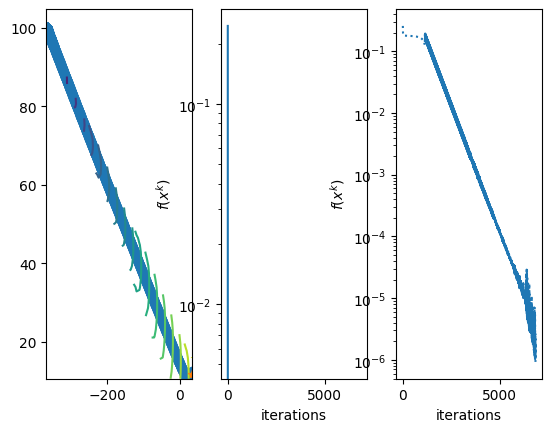

Newton
[1 2]
[-0.45564709 -0.25265448]
[34.01484178 12.52164353]
Temps d'execution (secondes) for test n° 2 :  0.0002739429473876953
(3,)
[-0.02884376 -0.48461827]
[np.float64(1.851018348374864), inf, np.float64(nan)]
1.6053294565253986


/tmp/ipykernel_14846/2352265973.py:6: RuntimeWarning: invalid value encountered in multiply
  return np.inf * np.eye(len(x))


ValueError: arange: cannot compute length

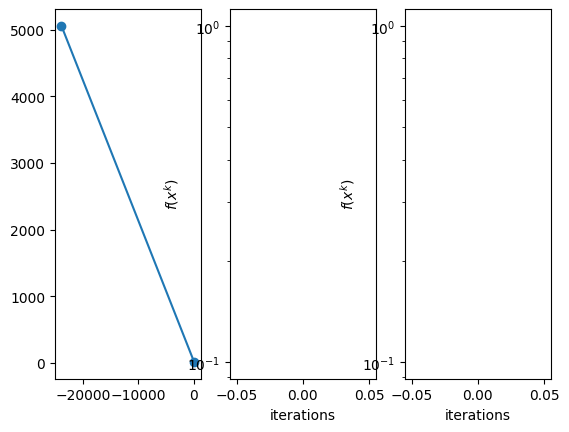

In [52]:
# Definitions de differents Méthodes
MET = np.array(['Pas Optimal',
                'Newton', 
                'Backtrack', 
                'Pas Optimal',
                'Pas Constant'
                ])

# Boucle pour chaque Méthode
for met in MET:
    print(met)
    Lambda = np.array((1,2))
    print(Lambda)
    np.random.seed(seed=1)
    P,q,r= quadratic_problem2d(Lambda)
    # check solution existency 
    xstar = -np.dot(np.linalg.inv(P),q)
    # fmin  = cost(xstar)
    x0 = np.ones(2)
    print(x0)
    A,b,c = create_problem(2,2,2,x0) 
    Lambda, Vpropre = np.linalg.eig(A)
    P,q,r= quadratic_problem2d(Lambda)
    xstar = -np.dot(np.linalg.inv(P),q)
    fmin  = cost(xstar)

    #grid
    ax= xstar[0]
    bx = xstar[0]
    ay= xstar[1]
    by = xstar[1]
        
    #
    start_time = time.time()
    xlist,flist,nlist =  Gradient_Descent(x0,cost,gradient,1e-2, met)
    RunTime = (time.time() - start_time) # Calcul du temps d'execution
    print("Temps d'execution (secondes) for test n°", 1,  ": ", RunTime)
    xlist = np.asarray(xlist)
    #
    fig = plt.figure(1) 
    plt.subplot(1,3,1)
    plt.plot(xlist[:,0], xlist[:,1],'o-',label='points')
#    #
    ax = np.min((xlist[:,0].min(),ax))-.1
    bx = np.max((xlist[:,0].max(),bx))+.1
    ay = np.min((xlist[:,1].min(),ay))-.1
    by = np.max((xlist[:,1].max(),by))+.1

    print(np.shape(nlist))
    print(Lambda)
    print(flist)
    print(fmin)
    plt.subplot(1,3,2)
    plt.semilogy(range(len(flist)),flist-fmin+1e-16)
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    plt.subplot(1,3,3)
    plt.semilogy(nlist,':')
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
        
    #    
    xgrid = np.arange(ax,bx,(bx-ax)/50)
    ygrid = np.arange(ay,by,(by-ay)/50)
    X, Y = np.meshgrid(xgrid, ygrid)
    Z = np.zeros(X.shape)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))

    plt.subplot(1,3,1)
    plt.contour(X, Y, Z,21)

    plt.plot(xstar[0], xstar[1],'*',label='points')
    plt.show()